# Numpy Array

###### This is detailed tutorial of numpy array.
###### Follow [our twitter]() for a daily tutorial.



[Numpy Array](https://numpy.org/doc/stable/reference/routines.array-creation.html)

In [38]:
import numpy as np
import pandas as pd
import datetime
import sys
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print(np.__version__)

1.22.4


#### 1. numpy.empty¶
numpy.empty(shape, dtype=float, order='C', *, like=None)  
Return a new array of given shape and type, without initializing entries.

In [2]:
# As mentioned, this method does not set the array value to zero. It, however, is supposed to be much
# faster than numpy.zeros. Let's test it out.

np.empty(shape=2)

array([ 8.02890124e-243, -1.31275838e-194])

In [37]:
np.empty(shape=2, dtype=int)

array([-515396076, 1081078906])

In [40]:
# This was expected but dtype=int is much smaller than dtype=float

print(sys.getsizeof(np.empty(shape=10**6, dtype=float)))
print(sys.getsizeof(np.empty(shape=10**6, dtype=int)))

8000112
4000112


In [56]:
def compare_exec_time(n_trial: int, n_rep: int, shape: tuple, order: str) -> None:
    t_empty, t_zeros = [], []

    for _ in range(n_trial):
        t_i = datetime.datetime.now()
        for __ in range(n_rep):
            ___ = np.empty(shape=shape, order=order)
        t_f = datetime.datetime.now()
        del_t = (t_f - t_i).microseconds
        t_empty.append(del_t)

    for _ in range(n_trial):
        t_i = datetime.datetime.now()
        for __ in range(n_rep):
            ___ = np.zeros(shape=shape, order=order)
        t_f = datetime.datetime.now()
        del_t = (t_f - t_i).microseconds
        t_zeros.append(del_t)

    empty_df = pd.DataFrame({"method": "empty", "t": t_empty})
    zeros_df = pd.DataFrame({"method": "zeros", "t": t_zeros})
    t_df = pd.concat([empty_df, zeros_df], axis=0)
    
    print(f"mean execution time for the empty method (millisec): {np.mean(t_empty)}")
    print(f"mean execution time for the zeros method (millisec): {np.mean(t_zeros)}")
    
    sns.boxplot(x='method', y='t', data=t_df)

In [ ]:
N_TRIALS = 10
N_REPS = 10**6

mean execution time for the empty method (millisec): 569090.8
mean execution time for the zeros method (millisec): 567671.1


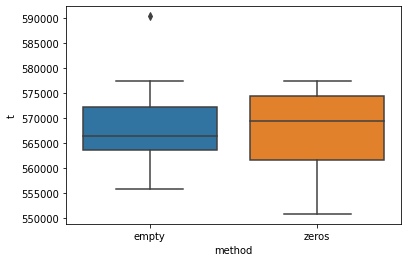

In [35]:
compare_exec_time(N_TRIALS, N_REPS, 2, "C")

mean execution time for the empty method (millisec): 574632.1
mean execution time for the zeros method (millisec): 586817.5


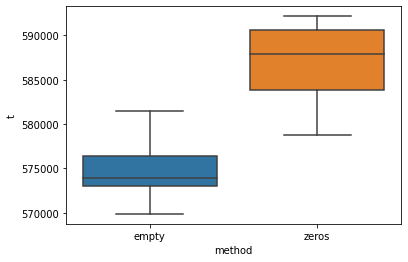

In [31]:
compare_exec_time(N_TRIALS, N_REPS, 10, "C")

mean execution time for the empty method (millisec): 243924.9
mean execution time for the zeros method (millisec): 260181.6


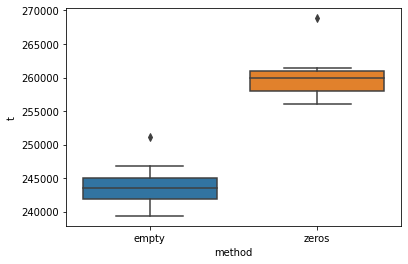

In [32]:
compare_exec_time(N_TRIALS, N_REPS, (10, 10), "C")

mean execution time for the empty method (millisec): 385430.0
mean execution time for the zeros method (millisec): 691456.3


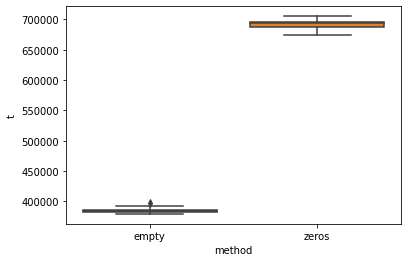

In [33]:
compare_exec_time(N_TRIALS, N_REPS, (10, 10, 10), "C")

mean execution time for the empty method (millisec): 574059.8
mean execution time for the zeros method (millisec): 437742.7


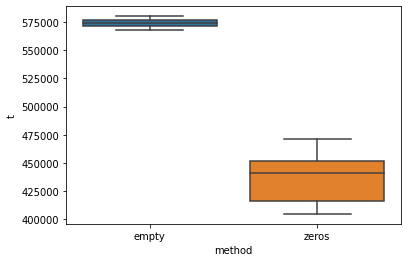

In [34]:
compare_exec_time(N_TRIALS, N_REPS, (10, 10, 10, 10), "C")

mean execution time for the empty method (millisec): 460874.0
mean execution time for the zeros method (millisec): 383687.6


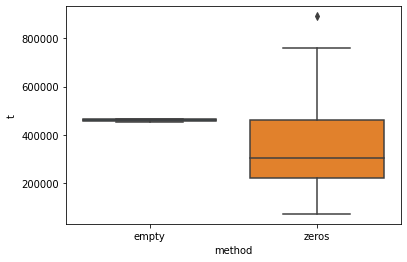

In [36]:
compare_exec_time(N_TRIALS, N_REPS, (10, 10, 10, 10, 10), "C")

#### On average, the empty method is much faster up to 3 dimentional array but array of higher order took longer with the empty method. It is however much more consistent in computational time.

In [50]:
np.empty(shape=(2, 3, 2), order="C")

array([[[238.14      ,  82.03626223],
        [372.06      ,  82.03626223],
        [372.06      , 140.05621767]],

       [[238.14      , 140.05621767],
        [238.14      ,  82.03626223],
        [137.7       ,  28.39102793]]])

In [51]:
np.empty(shape=(2, 3, 2), order="F")

array([[[238.14      , 238.14      ],
        [372.06      , 238.14      ],
        [372.06      , 137.7       ]],

       [[ 82.03626223, 140.05621767],
        [ 82.03626223,  82.03626223],
        [140.05621767,  28.39102793]]])

#### Two orders have identical elements but in different order. They are of the same type, size, and shape.

In [53]:
print(type(np.empty(shape=(2, 3, 2), order="C")))
print(type(np.empty(shape=(2, 3, 2), order="F")))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [54]:
print(sys.getsizeof(np.empty(shape=(2, 3, 2), order="C")))
print(sys.getsizeof(np.empty(shape=(2, 3, 2), order="F")))

240
240


In [55]:
print(np.shape(np.empty(shape=(2, 3, 2), order="C")))
print(np.shape(np.empty(shape=(2, 3, 2), order="F")))

(2, 3, 2)
(2, 3, 2)


#### There are no 

mean execution time for the empty method (millisec): 250939.1
mean execution time for the zeros method (millisec): 266677.5


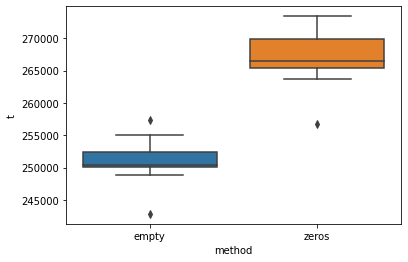

In [58]:
compare_exec_time(N_TRIALS, N_REPS, (10, 10), "C")

mean execution time for the empty method (millisec): 250173.8
mean execution time for the zeros method (millisec): 259130.3


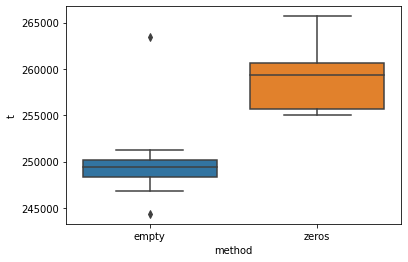

In [57]:
compare_exec_time(N_TRIALS, N_REPS, (10, 10), "F")